In [8]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import talib as ta
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_file

In [4]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbols

['ETH/USDT',
 'BTC/USDT',
 'BNB/USDT',
 'SOL/USDT',
 'ADA/USDT',
 'AVAX/USDT',
 'LINK/USDT',
 'MATIC/USDT',
 'LTC/USDT',
 'UNI/USDT']

In [5]:
symbol = symbols[0]
symbol

'ETH/USDT'

In [6]:
data = read_file.read_training_data(symbol)
data

Reading Raw Equity data: ETH !
Successfully read: ETH !


,open,high,low,close,volume
timestamp,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676
...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660


In [7]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [14]:
data['rsi'] = ta.RSI(data['close'], timeperiod=14)
data.head(100)

,open,high,low,close,volume,rsi
timestamp,,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434,NaN
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230,NaN
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130,NaN
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415,NaN
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676,NaN
...,...,...,...,...,...,...
2020-07-16 20:00:00,232.45,234.10,231.80,233.57,50281.79854,39.278809
2020-07-17 00:00:00,233.58,234.49,232.62,233.17,46930.69646,38.428365
2020-07-17 04:00:00,233.17,233.81,231.65,233.12,65739.79055,38.316687


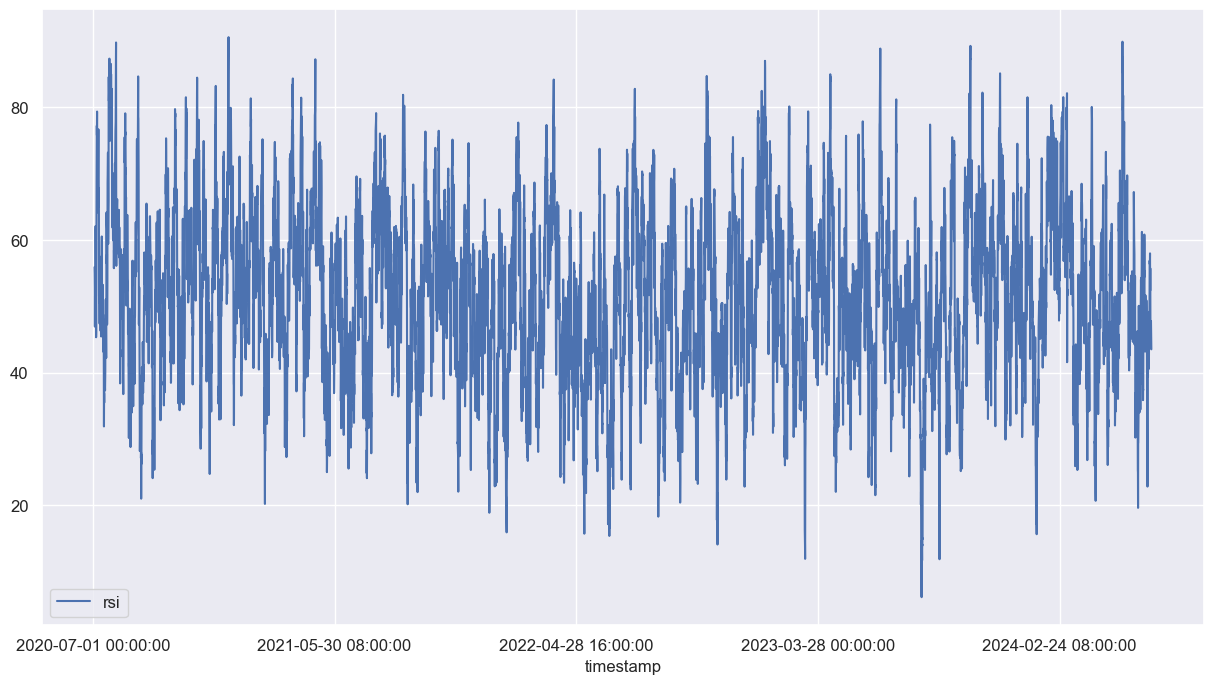

In [12]:
plot_df(data['rsi'])

In [15]:
data['sma-50'] = ta.SMA(data['close'], timeperiod=50)
data['sma-100'] = ta.SMA(data['close'], timeperiod=100)
data['sma-200'] = ta.SMA(data['close'], timeperiod=200)
data['ema-50'] = ta.EMA(data['close'], timeperiod=50)
data['ema-100'] = ta.EMA(data['close'], timeperiod=100)
data['ema-200'] = ta.EMA(data['close'], timeperiod=200)
data

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200
timestamp,,,,,,,,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638


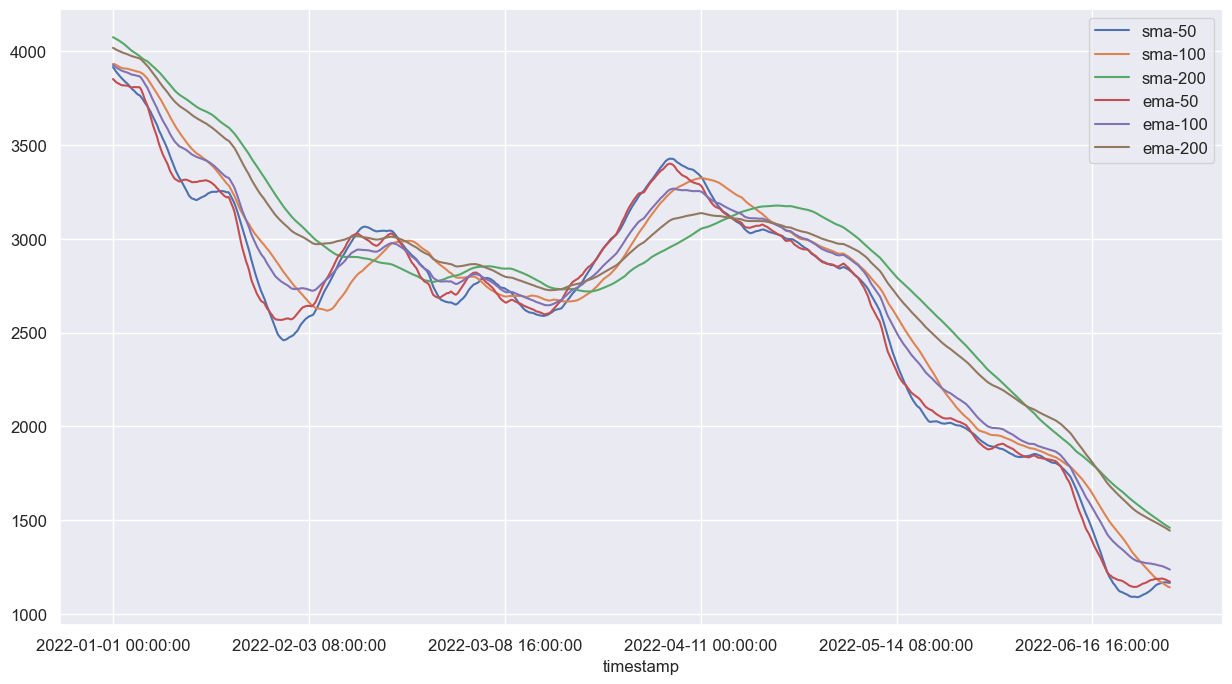

In [17]:
plot_df(data.loc['2022-01-01':'2022-06-30', ['sma-50', 'sma-100', 'sma-200', 'ema-50', 'ema-100', 'ema-200']])

In [19]:
data['atr'] = ta.ATR(data['high'], data['low'], data['close'], timeperiod=14)
data['adx'] = ta.ADX(data['high'], data['low'], data['close'], timeperiod=14)
data

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085,43.282212,18.399477
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293,41.537054,17.366498
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638,40.012979,16.556739


In [20]:
data.describe()

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
count,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8746.000000,8711.000000,8661.000000,8561.000000,8711.000000,8661.000000,8561.000000,8746.000000,8733.000000
mean,2079.877890,2103.864616,2053.932893,2080.237637,1.096447e+05,51.584160,2081.723847,2083.013883,2084.871706,2081.651038,2082.829053,2084.849442,49.956657,27.368689
std,1044.289671,1056.426404,1031.056474,1044.195210,9.975757e+04,12.689815,1034.144983,1023.199399,1000.407902,1030.901069,1016.841312,988.708424,37.239529,11.069064
min,224.860000,225.840000,222.870000,224.870000,1.617488e+02,6.133337,232.365000,235.570500,265.158850,232.365000,235.280709,265.158850,1.931859,7.830293
25%,1466.522500,1488.337500,1441.915000,1466.992500,4.772852e+04,42.852546,1501.565000,1485.474100,1462.069350,1489.166567,1473.671701,1476.270316,21.298363,19.031926
50%,1868.360000,1879.375000,1854.640000,1868.395000,8.074936e+04,51.598469,1871.340400,1860.508000,1862.972650,1868.171998,1868.129430,1861.604092,42.219346,24.751058
75%,2902.757500,2935.455000,2865.260000,2903.160000,1.369012e+05,60.139254,2890.033400,2883.074200,2881.346450,2880.448867,2892.142856,2907.680263,69.708668,34.003955
max,4846.940000,4868.000000,4776.370000,4846.710000,1.531897e+06,90.593453,4686.345600,4563.699700,4433.294550,4636.017489,4534.088693,4323.182337,308.416654,71.684578


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2020-07-01 00:00:00 to 2024-06-29 20:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     8760 non-null   float64
 1   high     8760 non-null   float64
 2   low      8760 non-null   float64
 3   close    8760 non-null   float64
 4   volume   8760 non-null   float64
 5   rsi      8746 non-null   float64
 6   sma-50   8711 non-null   float64
 7   sma-100  8661 non-null   float64
 8   sma-200  8561 non-null   float64
 9   ema-50   8711 non-null   float64
 10  ema-100  8661 non-null   float64
 11  ema-200  8561 non-null   float64
 12  atr      8746 non-null   float64
 13  adx      8733 non-null   float64
dtypes: float64(14)
memory usage: 1.3+ MB
